#### Imported packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
con = sqlite3.connect('Data/im.db')
cursor_obj = con.cursor()

#### Imported Data sets

In [6]:
mov_gross = pd.read_csv('Data/bom.movie_gross.csv')
tn_movie_budgets = pd.read_csv('Data/tn.movie_budgets.csv')
mov_info = pd.read_table('Data/rt.movie_info.tsv')
reviews = pd.read_table('Data/rt.reviews.tsv', encoding= 'unicode_escape')
rot_tom = pd.read_csv('Data/rotten_tomatoes_movies.csv')
db_mov = pd.read_csv('Data/tmdb.movies.csv', delimiter = ",")

#### Looked at each dataset.info() to find the relevant information. We'll be looking at genres of movies based on their popularity

In [8]:
db_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### Exploding the genre column to be able to plot the genres based on its popularity


In [10]:
genre_dic = {'Action'      :    28,
'Adventure'    :   12,
'Animation'     :  16,
'Comedy'         : 35,
'Crime'          : 80,
'Documentary'    : 99,
'Drama'          : 18,
'Family'         : 10751,
'Fantasy'        : 14,
'History'        : 36,
'Horror'         : 27,
'Music'          : 10402,
'Mystery'        : 9648,
'Romance'        : 10749,
'Science Fiction' : 878,
'TV Movie'       : 10770,
'Thriller'       : 53,
'War'            : 10752,
'Western'        : 37}


#### Switched the keys and values for the dictionary so it was easier to access. if we inserted the genre id, now we can recieve the genre name.
#### Also, any empty lists are replaces as NaN

In [11]:
gd= {str(y): x for x,y in genre_dic.items()}

gd[''] = np.nan

gd['28']

'Action'

#### deleted the single quotes between the genre id

In [12]:
db_mov['genre_ids'] = db_mov['genre_ids'].apply(lambda x: (x.replace("'", '')))

#### deleted the square brackets

In [13]:
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: x.replace(']',''))
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: x.replace('[',''))

#### deleted the commas 

In [14]:
db_mov['genre_ids'] = db_mov['genre_ids'].apply(lambda x: x.split(','))

#### replaced the extra spaces with single spaces

In [15]:
db_mov['genre_ids'] =db_mov['genre_ids'].apply(lambda x: [i.replace(' ','') for i in x])

#### for each genre dic item, make i in x (the genre_ids) the same.

In [16]:
db_mov['genre_names']= db_mov['genre_ids'].apply(lambda x: [gd[i]  for i in x])

#### explode the genre_names in the dataframe

In [18]:
exploded_genre_df = db_mov.explode('genre_names')

#### Create a bar plot

/Users/ashfa/miniconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'History'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Science Fiction'),
  Text(15, 0, 'TV Movie'),
  Text(16, 0, 'Thriller'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Western')])

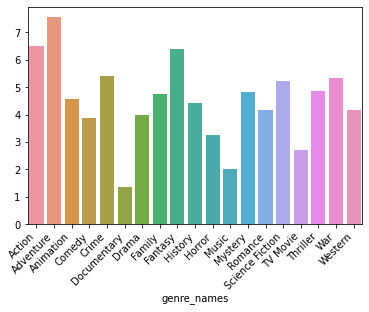

In [19]:
fix, ax = plt.subplots()
sns.barplot(exploded_genre_df.groupby('genre_names')['popularity'].mean().index,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values)
plt.xticks(rotation=45, ha='right')

In [ ]:
fix, ax = plt.subplots()
sns.barplot(exploded_genre_df.groupby('genre_names')['popularity'].mean().index,
            exploded_genre_df.groupby('genre_names')['popularity'].mean().values)
plt.xticks(rotation=45, ha='right')
